In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

def set_css_in_cell_output():
    display(HTML('''
        <style>
            .jupyter-widgets {color: #d5d5d5 !important;}
            .widget-label {color: #d5d5d5 !important;}
        </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css_in_cell_output)
from IPython.core import ultratb
ultratb.VerboseTB._tb_highlight = "bg:#0D0D0D"

In [2]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [13]:
######## uncomment lines to switch between datasets ########

#DATA_ROOT = './data/SST/'  # please contact the authors for access to the data
#scales_df = pd.read_csv(f'{DATA_ROOT}/SST_scales.csv')

DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
scales_df = pd.read_csv(f'{DATA_ROOT}/selfReport.csv')

#dataset = 'sst'
dataset = 'aapecs'

#id_col = 'subject'
id_col = 'participantID'

models = ['llms_avg',
          'gpt_41', 
          'claude_sonnet',
          'gemini_flash',
          'grok3_beta',
          'gpt_41_mini',
          'qwen3_235B',
          'llama_maverick',
         ]
output = 'text'

model_names = ['LLMs Average',
               'GPT-4.1', 
               'Claude-3.7 Sonnet',
               'Gemini-2.5 Flash', 
               'Grok-3 Beta',
               'GPT-4.1 Mini', 
               'Qwen3 235B',
               'Llama-4 Maverick',
               ]

#cols_of_interest = ['neuroticism',
#                    'extraversion',
#                    'openness',
#                    'agreeableness',
#                    'conscientiousness']
cols_of_interest = ['neoNeuroticism',
                    'neoExtraversion',
                    'neoOpenness',
                    'neoAgreeableness',
                    'neoConscientiousness']

In [ ]:
all_vals = {}
all_rs = {}
all_ps = {}

for c in cols_of_interest:
    c = c.replace('neo', '').lower()
    all_vals[c] = []

for model in models:
    df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{model}_{output}_per_question_scores.csv')
    df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
    scales_df_reorder = scales_df.set_index(id_col).reindex(df[[id_col]].values.flatten()).reset_index().copy()
    all_rs[model] = {}
    all_ps[model] = {}
    for col in cols_of_interest:
        x = scales_df_reorder[[col]].values.flatten()
        y = df[[col]].values.flatten()
        col = col.replace('neo', '').lower()
        r, p = scipy.stats.pearsonr(x, y)
        all_rs[model][col] = r
        all_ps[model][col] = p
        all_vals[col].append(y)

In [15]:
p_df = pd.DataFrame(all_ps)
p_df

,llms_avg,gpt_41,claude_sonnet,gemini_flash,grok3_beta,gpt_41_mini,qwen3_235B,llama_maverick
neuroticism,1.249846e-08,8.968358e-09,8.084947e-09,6.247419e-08,8.509911e-07,3.820314e-08,1.297498e-08,3.481704e-07
extraversion,5.952218e-12,8.908672e-13,2.181895e-12,2.475966e-10,2.895498e-11,1.969409e-10,9.882715e-09,2.370746e-09
openness,4.685350e-07,5.655834e-08,2.048034e-05,1.378732e-06,2.762808e-05,1.891744e-05,8.682690e-07,1.900503e-04
agreeableness,1.160702e-03,3.149750e-03,3.524882e-04,6.675800e-03,6.503417e-04,4.899087e-02,6.922978e-04,2.431797e-02
conscientiousness,1.997528e-03,1.994980e-03,1.145395e-02,9.073054e-04,1.770890e-02,2.122391e-02,2.061068e-03,2.939402e-02


In [16]:
formatted_pvals

,LLMs Average,GPT-4.1,Claude-3.7 Sonnet,Gemini-2.5 Flash,Grok-3 Beta,GPT-4.1 Mini,Qwen3 235B,Llama-4 Maverick
neuroticism,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
extraversion,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
openness,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
agreeableness,p=0.001,p=0.003,p<0.001,p=0.007,p<0.001,p=0.049,p<0.001,p=0.024
conscientiousness,p=0.002,p=0.002,p=0.011,p<0.001,p=0.018,p=0.021,p=0.002,p=0.029


In [17]:
p_df = pd.DataFrame(all_ps)
new_cols = []
for c in p_df.columns:
    new_c = model_names[models.index(c)]
    new_cols.append(new_c)
p_df.columns = new_cols
# Reformat p-values as described
def format_pval(p):
    try:
        return "p<0.001" if float(p) < 0.001 else f"p={float(p):.3f}"
    except:
        return str(p)

formatted_pvals = p_df.applymap(format_pval)
llms_avg_pvals = formatted_pvals['LLMs Average']
formatted_pvals

,LLMs Average,GPT-4.1,Claude-3.7 Sonnet,Gemini-2.5 Flash,Grok-3 Beta,GPT-4.1 Mini,Qwen3 235B,Llama-4 Maverick
neuroticism,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
extraversion,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
openness,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001,p<0.001
agreeableness,p=0.001,p=0.003,p<0.001,p=0.007,p<0.001,p=0.049,p<0.001,p=0.024
conscientiousness,p=0.002,p=0.002,p=0.011,p<0.001,p=0.018,p=0.021,p=0.002,p=0.029


In [18]:
df = pd.DataFrame(all_rs)
df

,llms_avg,gpt_41,claude_sonnet,gemini_flash,grok3_beta,gpt_41_mini,qwen3_235B,llama_maverick
neuroticism,0.514251,0.518591,0.519935,0.492303,0.453046,0.499177,0.513758,0.467039
extraversion,0.601276,0.619418,0.611006,0.561992,0.585242,0.564560,0.517328,0.535404
openness,0.462458,0.493706,0.397485,0.445225,0.391709,0.398999,0.452724,0.351653
agreeableness,0.308503,0.281629,0.337618,0.259551,0.323016,0.189918,0.321484,0.216646
conscientiousness,0.294206,0.294240,0.242487,0.314762,0.227853,0.221516,0.293359,0.209698


In [19]:
new_cols = []
for c in df.columns:
    new_c = model_names[models.index(c)]
    new_cols.append(new_c)
df.columns = new_cols
#df.to_csv('./sst_plot_data.csv')

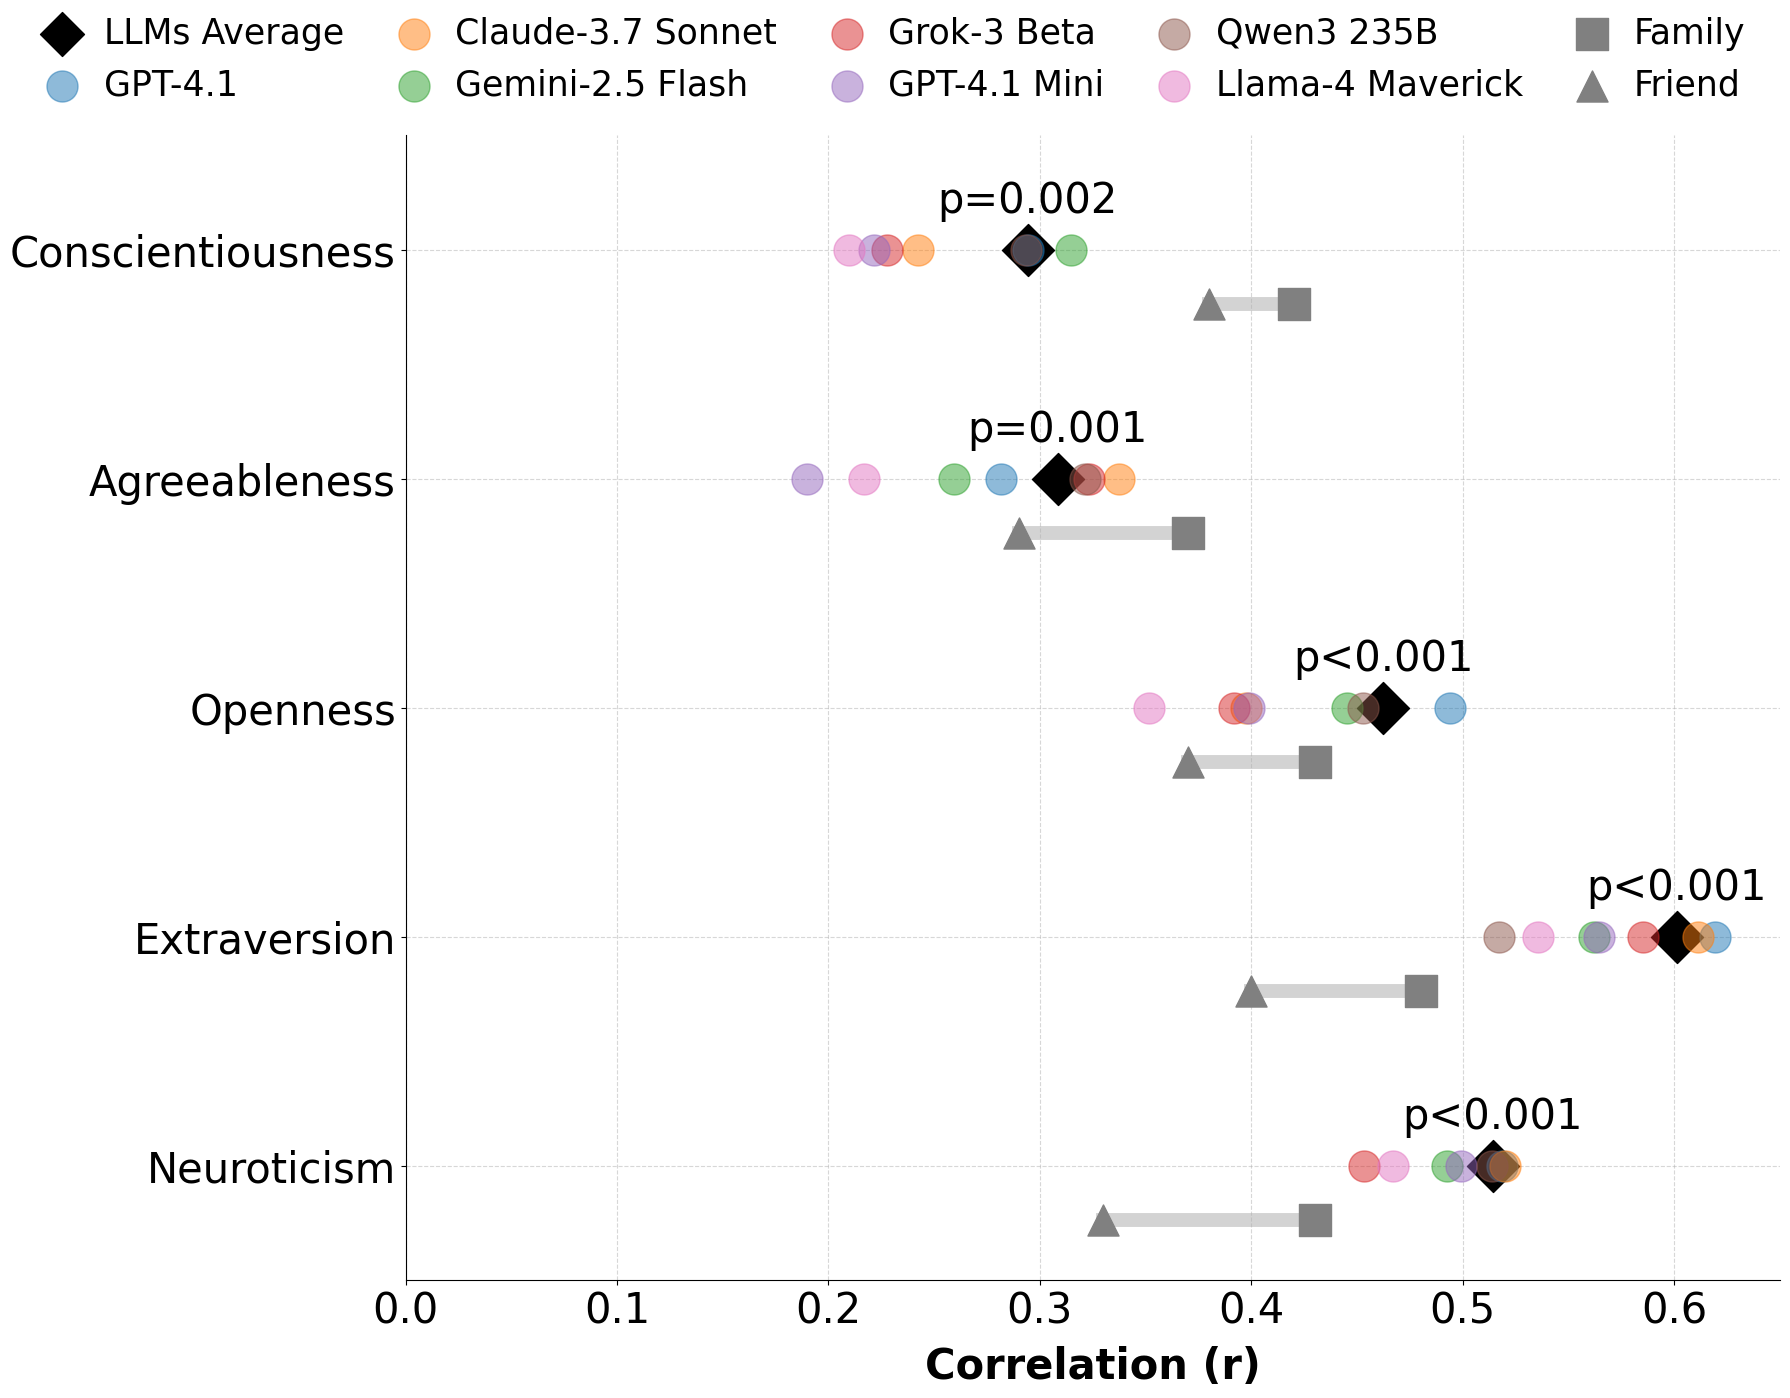

In [20]:
trait_names = [x.capitalize() for x in df.index]

# Prepare long format for plotting
df['trait_idx'] = range(len(df))
df_long = df.melt(id_vars='trait_idx', var_name='model', value_name='correlation')
df_long['trait_label'] = df_long['trait_idx'].map(lambda x: trait_names[x])

# Assign numeric positions and apply jitter
np.random.seed(42)  # for reproducibility
jitter_amount = 0
df_long['y_pos'] = df_long['trait_idx'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(df_long))

# Plot setup
fig, ax = plt.subplots(figsize=(18, 14))

# 3) Lighten the grid and hide top/right spines
ax.grid(True, which="major", axis="x")
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

# Plot each model
for model in df_long['model'].unique():
    subset = df_long[df_long['model'] == model]
    if model == 'LLMs Average':
        ax.scatter(
            subset['correlation'],
            subset['y_pos'],
            label=model,
            marker='D',
            s=700,
            color='Black', zorder=2
        )
    else:
        ax.scatter(
            subset['correlation'],
            subset['y_pos'],
            label=model,
            marker='o',
            s=500, alpha=0.5, zorder=5
        )

        
# Family and Friend data
family_friends = {
    'Neuroticism': {'Family': 0.43, 'Friend': 0.33},
    'Extraversion': {'Family': 0.48, 'Friend': 0.40},
    'Openness': {'Family': 0.43, 'Friend': 0.37},
    'Agreeableness': {'Family': 0.37, 'Friend': 0.29},
    'Conscientiousness': {'Family': 0.42, 'Friend': 0.38},
}

# Plot Family and Friend points and connecting bars
y_offset = -0.235
fam_plotted = False
fri_plotted = False
for trait, vals in family_friends.items():
    idx = trait_names.index(trait)
    x_fam = vals['Family']
    x_fri = vals['Friend']
    y_ff = idx + y_offset
    
    # Family marker
    ax.scatter(
        x_fam, y_ff, marker='s', s=500,
        color='gray', label=('Family' if not fam_plotted else ""), zorder=10
    )
    fam_plotted = True
    
    # Friend marker
    ax.scatter(
        x_fri, y_ff, marker='^', s=500,
        color='gray', label=('Friend' if not fri_plotted else ""), zorder=10
    )
    fri_plotted = True
    
    # Connecting bar
    ax.plot([x_fam, x_fri], [y_ff, y_ff], color='lightgray', linewidth=10, zorder=0)
        
        
# Set y-ticks to trait names at integer positions
ax.set_yticks(range(len(trait_names)))
ax.set_yticklabels(trait_names)
        
# Title and axis labels
#ax.set_title("SST", pad=50, fontsize=30, fontweight='bold')
ax.set_xlabel("Correlation (r)", fontsize=30, fontweight='bold', labelpad=10)
#ax.set_ylabel("Personality Trait", fontsize=30, fontweight='bold')

# Grid for both axes
ax.grid(axis='both', linestyle='--', alpha=0.5)

# Reorder legend entries: move 'llms_avg' first
handles, labels = ax.get_legend_handles_labels()
if 'LLMs Average' in labels:
    idx = labels.index('LLMs Average')
    la = labels.pop(idx)
    ha = handles.pop(idx)
    labels.insert(0, la)
    handles.insert(0, ha)

# Legend: two rows, minimal spacing
leg = ax.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.35, 1.125),
    ncol=5,
    frameon=False,
    labelspacing=0.5,
    handletextpad=0.2,
    columnspacing=1,
    borderpad=0.2,
    fontsize=25,
    #markerscale=1
)
# now force every marker in the legend to a fixed size
for lh in leg.legend_handles:
    lh.set_sizes([500])

# Annotate each llms_avg point with its p-value
for _, row in df_long[df_long['model'] == 'LLMs Average'].iterrows():
    trait = row['trait_label'].lower()
    trait_key = row['trait_idx']
    pval_text = llms_avg_pvals[trait.lower()]
    x = row['correlation']
    y = row['y_pos']
    ax.text(x, y + 0.125, pval_text, ha='center', va='bottom', fontsize=30)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim((0, 0.65))
ax.set_ylim((-0.5, 4.5))
ax.set_xticks(np.arange(0, 0.65, 0.1))
ax.tick_params(axis='both', which='major', labelsize=30)

# Tight layout
plt.tight_layout()
plt.show()

# MTMM

In [97]:
import pandas as pd
import numpy as np

def generate_mtmm_matrix(method_dfs, method_names):
    """
    Build a multitrait–multimethod correlation matrix with the upper-right triangle blanked out.
    - method_dfs: list of DataFrames (one per method), each with columns = traits.
    - method_names: list of strings, same length as method_dfs.
    Returns a DataFrame with a MultiIndex (Method, Trait) on both axes,
    but with all cells above the diagonal set to NaN (i.e. blank).
    """
    # 1) rename columns to MultiIndex (Method, Trait)
    renamed = []
    for df, m in zip(method_dfs, method_names):
        mi = pd.MultiIndex.from_product([[m], df.columns], names=['Method', 'Trait'])
        df2 = df.copy()
        df2.columns = mi
        renamed.append(df2)

    # 2) combine side by side
    combined = pd.concat(renamed, axis=1)

    # 3) compute full correlation matrix
    corr = combined.corr()

    # 4) build upper-triangle mask (k=1 excludes the diagonal)
    mask = np.triu(np.ones(corr.shape, dtype=bool), k=1)
    mask_df = pd.DataFrame(mask, index=corr.index, columns=corr.columns)

    # 5) blank out the upper-triangle
    #    you can choose either NaN or empty string; NaN will export as a blank cell in Excel
    corr = corr.where(~mask_df)  

    return corr

In [ ]:
######## uncomment lines to switch between datasets ########

DATA_ROOT = './data/SST/'  # please contact the authors for access to the data
scales_df = pd.read_csv(f'{DATA_ROOT}/SST_scales.csv')

#DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
#scales_df = pd.read_csv(f'{DATA_ROOT}/selfReport.csv')

dataset = 'sst'
#dataset = 'aapecs'

id_col = 'subject'
#id_col = 'participantID'

models = ['llms_avg',
          'gpt_41', 
          'claude_sonnet',
          'gemini_flash',
          'grok3_beta',
          'gpt_41_mini',
          'qwen3_235B',
          'llama_maverick',
         ]
output = 'text'

model_names = ['LLMs Average',
               'GPT-4.1', 
               'Claude-3.7 Sonnet',
               'Gemini-2.5 Flash', 
               'Grok-3 Beta',
               'GPT-4.1 Mini', 
               'Qwen3 235B',
               'Llama-4 Maverick',
               ]

cols_of_interest = ['neuroticism',
                    'extraversion',
                    'openness',
                    'agreeableness',
                    'conscientiousness']
#cols_of_interest = ['neoNeuroticism',
#                    'neoExtraversion',
#                    'neoOpenness',
#                    'neoAgreeableness',
#                    'neoConscientiousness']

In [107]:
df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{models[0]}_{output}_per_question_scores.csv')
scales_df = scales_df.set_index(id_col).reindex(df[[id_col]].values.flatten()).reset_index()
scales_df.shape

(60, 16)

In [108]:
dfs = [scales_df[cols_of_interest].copy()]

for model in models:
    df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{model}_{output}_per_question_scores.csv')
    df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
    df = df.set_index(id_col).reindex(scales_df[[id_col]].values.flatten()).reset_index()
    dfs.append(df.drop(columns=[id_col])[cols_of_interest].copy())

In [109]:
generate_mtmm_matrix(dfs, ["Self-Reported"] + model_names).to_excel(f'{DATA_ROOT}/{dataset}_mtmm_matrix.xlsx')

In [111]:
pd.concat([dfs[0], dfs[1]], axis=1).corr()

,neuroticism,extraversion,openness,agreeableness,conscientiousness,neuroticism,extraversion,openness,agreeableness,conscientiousness
neuroticism,1.000000,-0.281775,-0.075468,-0.338874,-0.443925,0.471683,-0.116983,0.025788,-0.251330,-0.403080
extraversion,-0.281775,1.000000,-0.016266,0.341379,0.230452,-0.067260,0.433902,0.185188,0.205649,0.180572
openness,-0.075468,-0.016266,1.000000,0.219868,0.085481,-0.232873,-0.016651,0.396821,0.143028,0.129585
agreeableness,-0.338874,0.341379,0.219868,1.000000,0.267697,-0.292072,0.213255,0.010013,0.546448,0.254624
conscientiousness,-0.443925,0.230452,0.085481,0.267697,1.000000,-0.182514,0.091967,-0.059263,0.131119,0.530821
neuroticism,0.471683,-0.067260,-0.232873,-0.292072,-0.182514,1.000000,-0.234714,-0.085199,-0.453966,-0.364728
extraversion,-0.116983,0.433902,-0.016651,0.213255,0.091967,-0.234714,1.000000,0.281835,0.492024,0.225678
openness,0.025788,0.185188,0.396821,0.010013,-0.059263,-0.085199,0.281835,1.000000,0.109281,0.033572
agreeableness,-0.251330,0.205649,0.143028,0.546448,0.131119,-0.453966,0.492024,0.109281,1.000000,0.307996
conscientiousness,-0.403080,0.180572,0.129585,0.254624,0.530821,-0.364728,0.225678,0.033572,0.307996,1.000000


# Windowed

In [62]:
######## uncomment lines to switch between datasets ########

#DATA_ROOT = './data/SST/'  # please contact the authors for access to the data
#scales_df = pd.read_csv(f'{DATA_ROOT}/SST_scales.csv')

DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
scales_df = pd.read_csv(f'{DATA_ROOT}/selfReport.csv')

#dataset = 'sst'
dataset = 'aapecs'

#id_col = 'subject'
id_col = 'participantID'

models = ['llms_avg',
          'gpt_41', 
          'claude_sonnet',
          'gemini_flash',
          'grok3_beta',
          'gpt_41_mini',
          'qwen3_235B',
          'llama_maverick',
         ]
output = 'text'

model_names = ['LLMs Average',
               'GPT-4.1', 
               'Claude-3.7 Sonnet',
               'Gemini-2.5 Flash', 
               'Grok-3 Beta',
               'GPT-4.1 Mini', 
               'Qwen3 235B',
               'Llama-4 Maverick',
               ]

#cols_of_interest = ['neuroticism',
#                    'extraversion',
#                    'openness',
#                    'agreeableness',
#                    'conscientiousness']
cols_of_interest = ['neoNeuroticism',
                    'neoExtraversion',
                    'neoOpenness',
                    'neoAgreeableness',
                    'neoConscientiousness']

In [64]:
df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{model}_{output}_per_question_scores_windowed.csv')
scales_df = scales_df.set_index(id_col).reindex(df[[id_col]].values.flatten()).reset_index()
assert np.all(scales_df[id_col].map(int).values.flatten() == df[id_col].map(int).values.flatten())
scales_df.shape

(108, 891)

In [65]:
#MINUTE_CHUNKS = np.array([1, 5, 10, 15, 20, 25, 30]) * 60
MINUTE_CHUNKS = np.arange(1, 15, 2)
MINUTE_CHUNKS

array([ 1,  3,  5,  7,  9, 11, 13])

In [66]:
import numpy as np
from scipy import stats

def pearsonr_ci(x, y, alpha=0.05):
    """
    Returns Pearson r, its two-sided 100*(1–alpha)% CI, and p-value.
    """
    r, p = stats.pearsonr(x, y)
    n = len(x)
    # Fisher z
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)
    lo_z, hi_z = z - z_crit * se, z + z_crit * se
    # back to r
    lo, hi = np.tanh([lo_z, hi_z])
    return r, lo, hi, p

"""
def pearsonr_ci(x, y, n_bootstraps=1000, alpha=0.05, random_state=None):
    rng = np.random.default_rng(random_state)
    n = len(x)
    boot_rs = np.empty(n_bootstraps)
    for i in range(n_bootstraps):
        idx = rng.integers(0, n, n)
        boot_rs[i] = stats.pearsonr(x[idx], y[idx])[0]
    lower = np.percentile(boot_rs, 100 * (alpha/2))
    upper = np.percentile(boot_rs, 100 * (1 - alpha/2))
    return np.mean(boot_rs), lower, upper, np.nan
#"""
pass

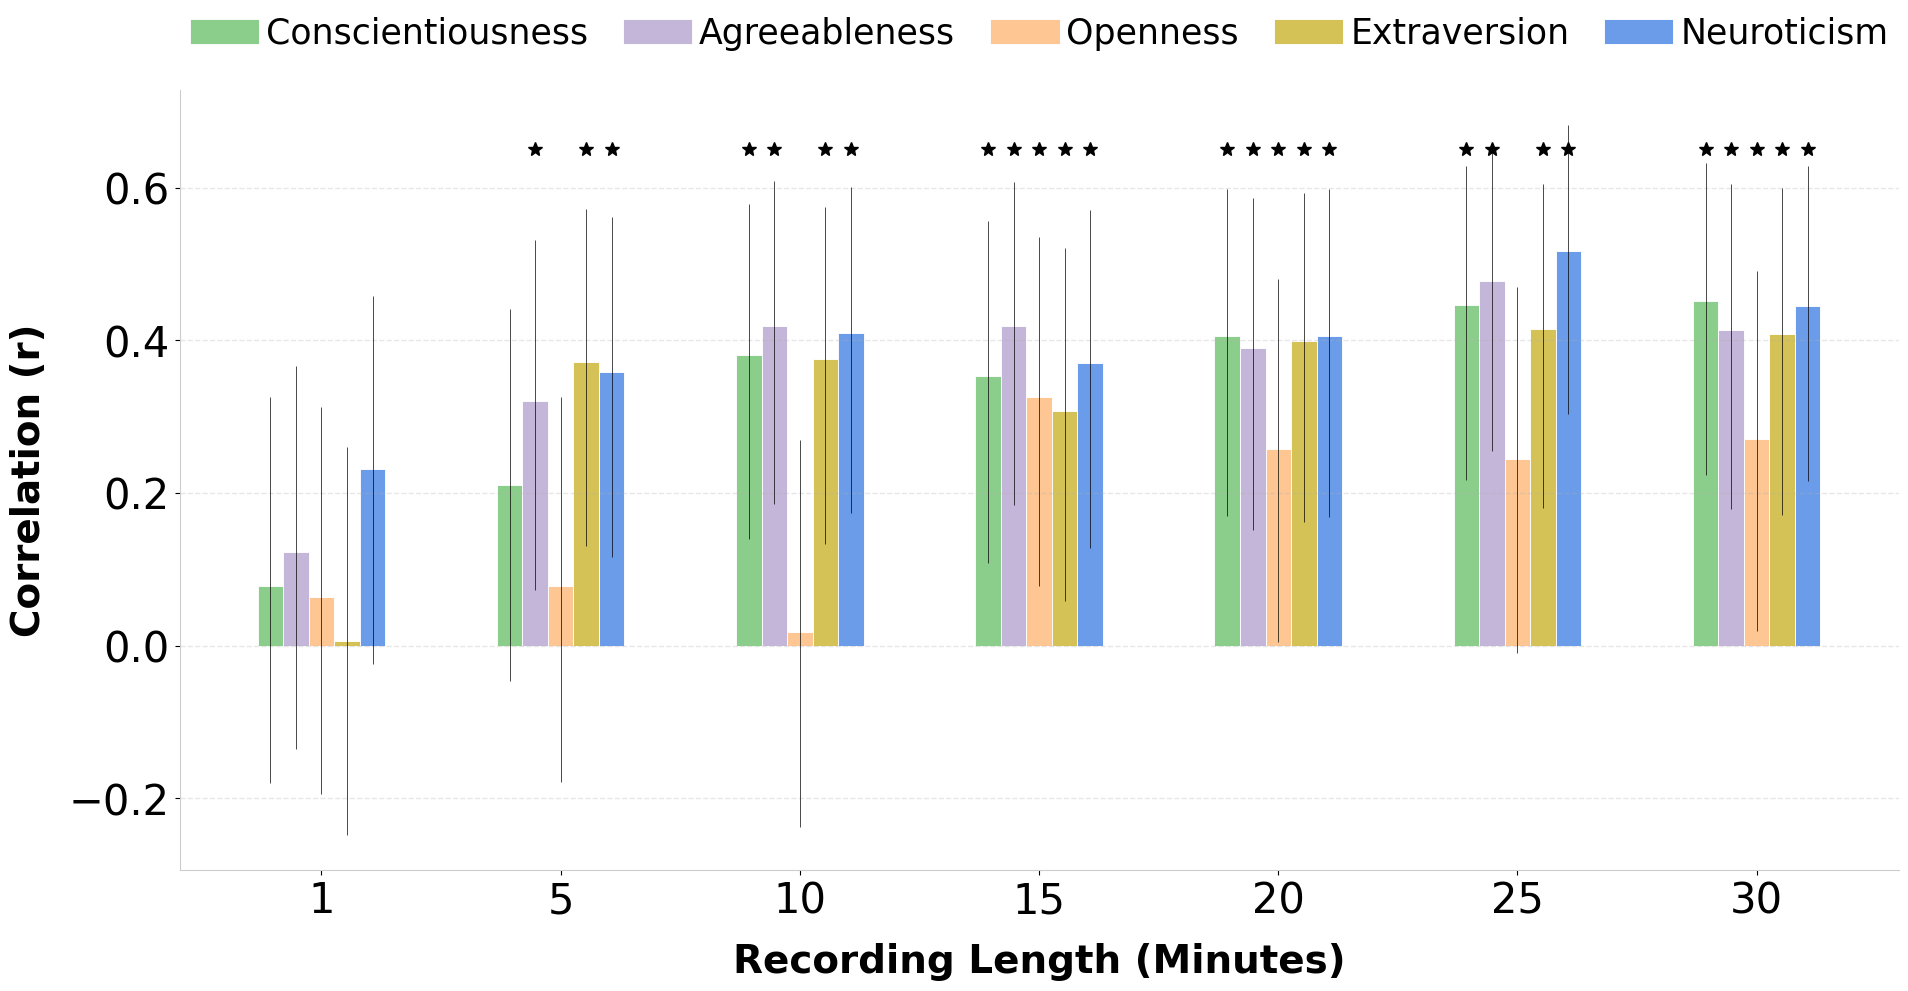

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_facecolor("white")

# Lighten the grid and hide top/right spines
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=1, alpha=0.3)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Prepare colormap (Accent) and bar‐width
M = len(cols_of_interest)
K = len(MINUTE_CHUNKS)
w = 0.8 / M

# Increase spacing between minute‐groups by multiplying the index
spacing = 1.5
base_x = np.arange(K) * spacing  # 0, spacing, 2*spacing, …, (K−1)*spacing

base_colors = list(plt.get_cmap("Accent").colors)
# Accent’s fourth color is '#ffff99' (a pale yellow). Replace it:
base_colors[3] = "#d1bc43"  # e.g., a darker rust‐brown that shows on white
base_colors[4] = '#5a91e8'
colors = [base_colors[i] for i in range(M)]

for j, c in enumerate(cols_of_interest):
    offset = (j - (M - 1) / 2) * w

    # Collect r, lo, hi for every minute‐chunk
    r_vals = []
    lo_vals = []
    hi_vals = []
    p_vals = []
    for minute in MINUTE_CHUNKS:
        v1 = df[f"{c}_{minute}"].values.flatten()
        v2 = scales_df[c].values.flatten()
        r, lo, hi, p = pearsonr_ci(v1, v2)
        r_vals.append(r)
        lo_vals.append(lo)
        hi_vals.append(hi)
        p_vals.append(p)

    # Plot the bars
    ax.bar(
        base_x + offset,
        r_vals,
        width=w,
        label=c.capitalize(),
        color=colors[j],
        edgecolor="white",
        linewidth=0.7,
        alpha=0.9,
    )

    # Overlay black vertical lines for (lo, hi) at each bar's center
    for i in range(K):
        x_pos = base_x[i] + offset
        ax.vlines(
            x_pos,
            lo_vals[i],
            hi_vals[i],
            color="black",
            linewidth=0.5
        )
        if p_vals[i] < 0.05:
            ax.plot(x_pos, 
                    #hi_vals[i] + 0.05, 
                    0.65,
                    marker='*', c='k', markersize=10)

# X‐axis ticks & labels (using the spaced base_x)
ax.set_xticks(base_x)
ax.set_xticklabels([int(x) for x in MINUTE_CHUNKS / 60], fontsize=24, rotation=0)
ax.set_xlabel("Recording Length (Minutes)", fontsize=28, labelpad=15, fontweight='bold')
ax.set_ylabel("Correlation (r)", fontsize=28, labelpad=15, fontweight='bold')

# Y‐axis styling
ax.tick_params(axis="y", which="major", labelsize=24)
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")

# Reorder legend entries if desired
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.125),
    ncol=5,
    frameon=False,
    labelspacing=0.5,
    handletextpad=0.2,
    columnspacing=1,
    borderpad=0.2,
    fontsize=25,
)
ax.tick_params(axis="both", which="major", labelsize=30)

# Tight layout for spacing
plt.tight_layout()
plt.show()


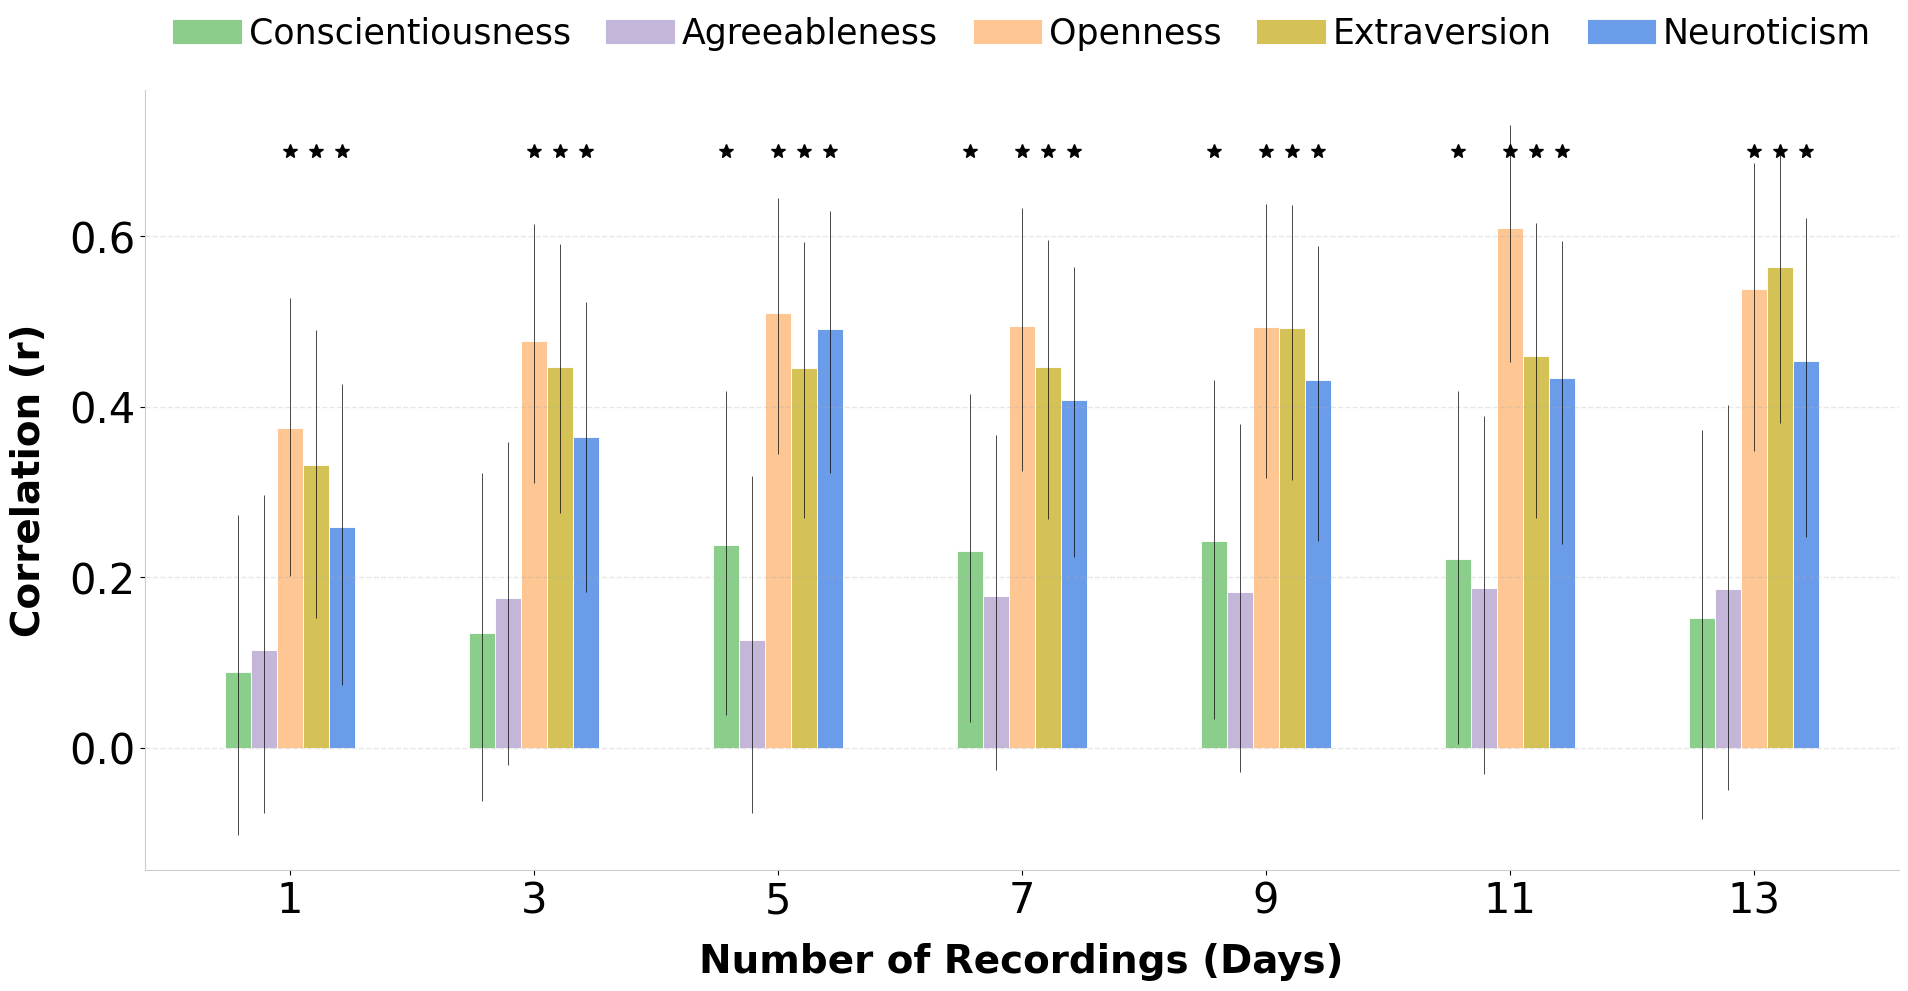

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_facecolor("white")

# Lighten the grid and hide top/right spines
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=1, alpha=0.3)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Prepare colormap (Accent) and bar‐width
M = len(cols_of_interest)
K = len(MINUTE_CHUNKS)
w = 0.8 / M

# Increase spacing between minute‐groups by multiplying the index
spacing = 1.5
base_x = np.arange(K) * spacing  # 0, spacing, 2*spacing, …, (K−1)*spacing

base_colors = list(plt.get_cmap("Accent").colors)
# Accent’s fourth color is '#ffff99' (a pale yellow). Replace it:
base_colors[3] = "#d1bc43"  # e.g., a darker rust‐brown that shows on white
base_colors[4] = '#5a91e8'
colors = [base_colors[i] for i in range(M)]

for j, c in enumerate(cols_of_interest):
    offset = (j - (M - 1) / 2) * w

    # Collect r, lo, hi for every minute‐chunk
    r_vals = []
    lo_vals = []
    hi_vals = []
    p_vals = []
    for minute in MINUTE_CHUNKS:
        tmp_df = df[[id_col, f"{c}_{minute}"]].dropna()
        tmp_scales = scales_df.set_index(id_col).reindex(tmp_df[[id_col]].values.flatten()).reset_index()
        
        v1 = tmp_df[f"{c}_{minute}"].values.flatten()
        v2 = tmp_scales[c].values.flatten()
        r, lo, hi, p = pearsonr_ci(v1, v2)
        r_vals.append(r)
        lo_vals.append(lo)
        hi_vals.append(hi)
        p_vals.append(p)

    # Plot the bars
    ax.bar(
        base_x + offset,
        r_vals,
        width=w,
        label=c.replace('neo', '').capitalize(),
        color=colors[j],
        edgecolor="white",
        linewidth=0.7,
        alpha=0.9,
    )

    # Overlay black vertical lines for (lo, hi) at each bar's center
    for i in range(K):
        x_pos = base_x[i] + offset
        ax.vlines(
            x_pos,
            lo_vals[i],
            hi_vals[i],
            color="black",
            linewidth=0.5
        )
        if p_vals[i] < 0.05:
            ax.plot(x_pos, 
                    #hi_vals[i] + 0.05, 
                    0.7,
                    marker='*', c='k', markersize=10)

# X‐axis ticks & labels (using the spaced base_x)
ax.set_xticks(base_x)
ax.set_xticklabels(MINUTE_CHUNKS, fontsize=24, rotation=0)
ax.set_xlabel("Number of Recordings (Days)", fontsize=28, labelpad=15, fontweight='bold')
ax.set_ylabel("Correlation (r)", fontsize=28, labelpad=15, fontweight='bold')

# Y‐axis styling
ax.tick_params(axis="y", which="major", labelsize=24)
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")

# Reorder legend entries if desired
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.125),
    ncol=5,
    frameon=False,
    labelspacing=0.5,
    handletextpad=0.2,
    columnspacing=1,
    borderpad=0.2,
    fontsize=25,
)
ax.tick_params(axis="both", which="major", labelsize=30)

# Tight layout for spacing
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import time
from scipy import stats
import json


pheno_df = pd.read_csv('../../aiden/eod_new_time.csv')
data_root = '../../aiden/raw_video_logs'
data_files = [f for f in listdir(data_root) if isfile(join(data_root, f))]

sub_transcripts = {}
n_words = {}

for file in data_files:
    df = pd.read_csv(f'{data_root}/{file}')
    df = df[(df.values[:, -1] != 'NO_ANSWER') & (df.values[:, -1] != 'SKIPPED')]

    dates = [x.replace('/', '_') for x in df['Survey Submitted Date'].values]  # dd_mm_yyyy
    times = [x.replace(':', '-') for x in df['Survey Submitted Time'].values]  # dd_mm_yyyy
    addresses = df.values[:, -1]
    userid = df['User Id'].values
    usernum = file.lower().replace('eod', '').replace('vids', '').replace('videos', '').replace('.csv', '').replace('video', '')
    usernum = int(usernum)
    triggers = [x.replace(' ', '') for x in df['Trigger Type'].values]

    assert np.all(['http' in x for x in addresses])
    assert np.all((df['Trigger Type'].values == "DAILY") | (df['Trigger Type'].values == "DELETED TRIGGER") | (df['Trigger Type'].values == "ONCE"))
    assert np.all([x.split('/')[-1].split('.')][-1] == 'mp4' for x in addresses)
    
    sub_pheno_df = pheno_df[pheno_df.participantID == usernum]
    if sub_pheno_df.shape[0] == 0: continue

    
    for i in range(len(addresses)):
        txt = json.load(open(f'../../aiden/transcripts_json/{usernum}/{usernum}_{dates[i]}_{times[i]}_{triggers[i]}_{userid[i]}.json'))['text'].strip()
        
        day, month, year = dates[i].split('_')
        sub = usernum
        if sub not in sub_transcripts:
            sub_transcripts[sub] = []
            n_words[sub] = []
        sub_transcripts[sub].append(txt)
        n_words[sub].append(len(txt.split(' ')))

In [68]:
MINUTE_CHUNKS

array([ 1,  3,  5,  7,  9, 11, 13])

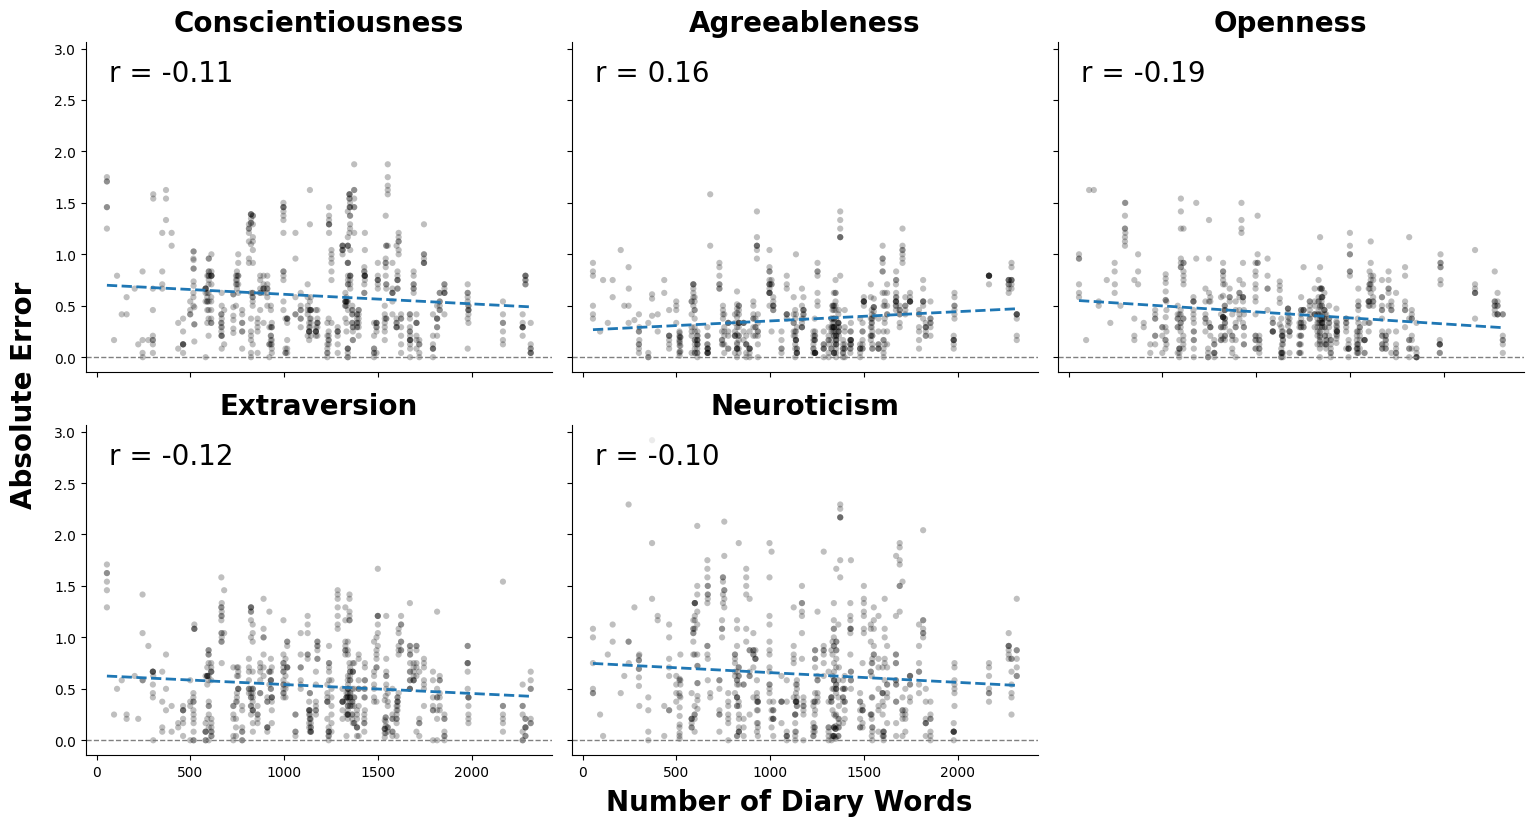

In [96]:
import matplotlib.pyplot as plt

# Assume the following are already defined in your environment:
#   df               : pandas DataFrame containing columns like "{c}_{minute}"
#   scales_df        : pandas DataFrame containing the “true” values for each c
#   sub_transcripts  : dict mapping subject IDs to lists of transcript‐strings
#   id_col           : name of the column in df that holds subject IDs
#   cols_of_interest : list of 5 column‐bases, e.g.:
#                        ["neoNeuroticism", "neoExtraversion", "neoAgreeableness",
#                         "neoConscientiousness", "neoOpenness"]
#   MINUTE_CHUNKS    : list of minute‐chunk identifiers, e.g. [0, 1, 2, 3, 4]
#   t_i              : integer index indicating how many transcript segments to include

sub_order = df[id_col].values.flatten()

# We want a 2×3 grid (3 columns, 2 rows), which can hold up to 6 plots.
n_plots = len(cols_of_interest)   # here = 5
n_rows, n_cols = 2, 3

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(5 * n_cols, 4 * n_rows),
    sharex=True,
    sharey=True
)

# Flatten the axes for easy iteration
axes_flat = axes.flatten()

# For each column of interest, compute and draw its scatter plot
for ax_i, (ax, c) in enumerate(zip(axes_flat, cols_of_interest)):
    x_vals = []
    y_vals = []
    for minute in MINUTE_CHUNKS:
        # 1) Compute transcript length for each subject at this minute
        n_words = []
        for s in sub_order:
            transcript_segments = sub_transcripts[s][:t_i]
            transcript = " ".join(seg.replace("\n", " ") for seg in transcript_segments)
            transcript_len = len(transcript.split())
            n_words.append(transcript_len)

        # 2) Get predicted (v1) and true (v2) values for column c at this minute
        v1 = df[f"{c}_{minute}"].values.flatten()
        v2 = scales_df[c].values.flatten()
        err = np.abs(v2 - v1)

        # 3) Extend x_vals and y_vals
        x_vals.extend(n_words)
        y_vals.extend(err.tolist())

    # 4) Plot on this axis
    ax.scatter(
        x_vals,
        y_vals,
        alpha=0.25,
        s=20,
        c="k",
        edgecolor="none"
    )
    ax.axhline(0, color="gray", linestyle="--", linewidth=1)
    ax.set_title(c.replace('neo', '').capitalize(), fontsize=20, pad=8, fontweight='bold')
    #if ax_i in [0, 3]:
    #    ax.set_ylabel("Error\nSelf-Reported − Predicted", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        
    # 5) Fit a line of best fit using numpy.polyfit
    tmp_df = pd.DataFrame()
    tmp_df['x'] = x_vals
    tmp_df['y'] = y_vals
    tmp_df = tmp_df.dropna()
    x = np.array(tmp_df.x.values.flatten())
    y = np.array(tmp_df.y.values.flatten())

    m, b = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = m * x_line + b
    ax.plot(x_line, y_line, color="C0", linewidth=2, linestyle='--')

    # 6) Compute Pearson r for (x, y)
    r_val, _ = scipy.stats.pearsonr(x, y)

    # 7) Display r in the top‐left corner of the subplot
    ax.text(
        0.05, 0.95,
        f"r = {r_val:.2f}",
        transform=ax.transAxes,
        va="top",
        fontsize=20,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="white", alpha=0.7)
    )
    ax.set_xlabel("", fontsize=12)



# 5) Turn off any unused subplots (since we have 6 slots but only 5 plots)
for empty_ax in axes_flat[n_plots:]:
    empty_ax.axis("off")

# 12) Add a single, shared y‐axis label on the left using fig.text
fig.text(
    -0.01,                # x-position (5% from left)
    0.5,                 # y-position (50% up)
    "Absolute Error",
    va="center",
    ha='center',
    rotation="vertical",
    fontsize=20,
    fontweight='bold'
)

fig.text(
    0.5,                   # x-position (5% from left)
    -0.01,                 # y-position (50% up)
    "Number of Diary Words",
    va="center",
    ha='center',
    rotation=0,
    fontsize=20,
    fontweight='bold'
)
plt.tight_layout()
plt.show()


# External Validation

In [138]:
DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
base_df = pd.read_csv(f'{DATA_ROOT}/GPTvalid.csv')
llm_df = pd.read_csv(f'{DATA_ROOT}/aapecs_llms_avg_text_per_question_scores.csv')
base_df = base_df.set_index('participantID').reindex(llm_df.participantID.values.flatten()).reset_index()
base_df = base_df.dropna()
base_df.shape

(103, 9)

In [139]:
llm_df = llm_df.set_index('participantID').reindex(base_df.participantID.values.flatten()).reset_index()
llm_df.shape

(103, 7)

In [140]:
col_to_name = {'posaff': 'Positive Affect',
               'negaff': 'Negative Affect',
               'warmth': 'Warm Behavior',
               'dominance': 'Dominant Behavior',
               'stress': 'Stress',
               'mentalHealth': 'Mental-Health Treatment',
               'Internalizing': 'Internalizing',
               'persdisord': 'Personality Disorder'}
base_df = base_df.rename(columns=col_to_name)

In [141]:
base_df.head()

,participantID,Positive Affect,Negative Affect,Warm Behavior,Dominant Behavior,Stress,Internalizing,Personality Disorder,Mental-Health Treatment
0,85,43.383333,29.266667,-5.200000,5.400000,1.789474,1,15,2
1,54,37.198630,4.517123,-50.000000,49.000000,0.444444,0,0,0
2,78,32.746575,20.705479,7.761905,5.857143,3.415094,0,7,2
3,97,41.920000,27.726667,13.000000,-17.266667,3.095238,0,1,1
4,48,31.939815,0.085648,0.500000,0.500000,0.222222,0,2,0


In [142]:
llm_df = llm_df[['neoConscientiousness', 'neoAgreeableness', 'neoOpenness', 'neoExtraversion', 'neoNeuroticism']]
llm_df.head()

,neoConscientiousness,neoAgreeableness,neoOpenness,neoExtraversion,neoNeuroticism
0,2.494048,2.702381,1.547619,1.107143,2.636905
1,3.273810,2.964286,1.869048,2.250000,1.916667
2,2.684524,3.238095,2.119048,1.553571,3.083333
3,2.904762,3.226190,2.345238,2.047619,1.684524
4,3.261905,3.089286,1.577381,2.071429,0.797619


In [143]:
vals = []
for c in base_df.columns:
    for c2 in llm_df.columns:
        if 'unnamed' in c.lower() or 'unnamed' in c2.lower(): continue
        if 'participant' in c.lower() or 'participant' in c2.lower(): continue
        r, lo, hi, p = pearsonr_ci(base_df[[c]].values.flatten(),
                                   llm_df[[c2]].values.flatten())
        vals.append([c, c2, r, lo, hi, p])

In [144]:
r_df = pd.DataFrame(vals)
r_df.columns = ['external_variable', 'llm_prediction', 'r', 'lo', 'hi', 'p']
r_df.head()

,external_variable,llm_prediction,r,lo,hi,p
0,Positive Affect,neoConscientiousness,0.121627,-0.073631,0.307904,0.221003
1,Positive Affect,neoAgreeableness,-0.086446,-0.275364,0.108901,0.385260
2,Positive Affect,neoOpenness,0.140538,-0.054468,0.325218,0.156794
3,Positive Affect,neoExtraversion,0.357330,0.175974,0.515226,0.000211
4,Positive Affect,neoNeuroticism,-0.312479,-0.477149,-0.126611,0.001311


In [148]:
df_corr = r_df
pivot_r = df_corr.pivot(
    index   = "external_variable",
    columns = "llm_prediction",
    values  = "r"
)
pivot_p = df_corr.pivot(
    index   = "external_variable",
    columns = "llm_prediction",
    values  = "p"
)

traits = list(pivot_r.columns)  # e.g. ["neoExtraversion", "neoAgreeableness", …]


# ─── 3. Build a DataFrame with a MultiIndex on the columns ─────────────────────────────

# Create MultiIndex: for each trait we’ll have (“r” and “p”)
tuples = []
for t in traits:
    tuples.append((t, "r"))
    tuples.append((t, "p"))

col_index = pd.MultiIndex.from_tuples(tuples, names=["Trait", "Metric"])

# Create the empty table DataFrame
table_df = pd.DataFrame(index=pivot_r.index, columns=col_index)

# Fill in formatted strings
for t in traits:
    table_df[(t, "r")] = pivot_r[t].map("{:.2f}".format)
    table_df[(t, "p")] = pivot_p[t].map("{:.3f}".format)

In [149]:
table_df

Trait                   neoAgreeableness        neoConscientiousness         \
Metric                                 r      p                    r      p   
external_variable                                                             
Dominant Behavior                  -0.16  0.114                -0.07  0.480   
Internalizing                      -0.17  0.095                -0.25  0.012   
Mental-Health Treatment            -0.00  0.988                -0.09  0.356   
Negative Affect                    -0.08  0.408                -0.28  0.005   
Personality Disorder               -0.26  0.008                -0.37  0.000   
Positive Affect                    -0.09  0.385                 0.12  0.221   
Stress                              0.09  0.363                -0.09  0.388   
Warm Behavior                       0.30  0.002                 0.12  0.230   

Trait                   neoExtraversion        neoNeuroticism         \
Metric                                r      p              r      p   
external_variable                                                      
Dominant Behavior                  0.15  0.140          -0.09  0.368   
Internalizing                     -0.25  0.010           0.32  0.001   
Mental-Health Treatment           -0.18  0.071           0.44  0.000   
Negative Affect                   -0.30  0.002           0.51  0.000   
Personality Disorder              -0.26  0.009           0.38  0.000   
Positive Affect                    0.36  0.000          -0.31  0.001   
Stress                            -0.12  0.219           0.32  0.001   
Warm Behavior                      0.10  0.330          -0.08  0.398   

Trait                   neoOpenness         
Metric                            r      p  
external_variable                           
Dominant Behavior             -0.07  0.513  
Internalizing                  0.02  0.854  
Mental-Health Treatment        0.26  0.007  
Negative Affect                0.04  0.722  
Personality Disorder           0.06  0.577  
Positive Affect                0.14  0.157  
Stress                         0.09  0.342  
Warm Behavior                  0.17  0.085

In [147]:
table_df.to_csv(f'{DATA_ROOT}/aapecs_external_validation.csv')

# Generate LLMs Average Files

In [ ]:
######## uncomment lines to switch between datasets ########

#DATA_ROOT = './data/SST/'  # please contact the authors for access to the data
#scales_df = pd.read_csv(f'{DATA_ROOT}/SST_scales.csv')

DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
scales_df = pd.read_csv(f'{DATA_ROOT}/selfReport.csv')

#dataset = 'sst'
dataset = 'aapecs'

#id_col = 'subject'
id_col = 'participantID'

models = ['llms_avg',
          'gpt_41', 
          'claude_sonnet',
          'gemini_flash',
          'grok3_beta',
          'gpt_41_mini',
          'qwen3_235B',
          'llama_maverick',
         ]
output = 'text'

model_names = ['LLMs Average',
               'GPT-4.1', 
               'Claude-3.7 Sonnet',
               'Gemini-2.5 Flash', 
               'Grok-3 Beta',
               'GPT-4.1 Mini', 
               'Qwen3 235B',
               'Llama-4 Maverick',
               ]

#cols_of_interest = ['neuroticism',
#                    'extraversion',
#                    'openness',
#                    'agreeableness',
#                    'conscientiousness']
cols_of_interest = ['neoNeuroticism',
                    'neoExtraversion',
                    'neoOpenness',
                    'neoAgreeableness',
                    'neoConscientiousness']

In [ ]:
df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{models[0]}_{output}_per_question_scores.csv')
scales_df = scales_df.set_index(id_col).reindex(df[[id_col]].values.flatten()).reset_index()
scales_df.shape

In [ ]:
vals = []
for model in models:
    df = pd.read_csv(f'{DATA_ROOT}/{dataset}_{model}_{output}_per_question_scores.csv')
    df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
    df = df.set_index(id_col).reindex(scales_df[[id_col]].values.flatten()).reset_index()
    vals.append(df[cols_of_interest].values)

In [ ]:
avg_vals = np.array(vals).mean(0)
out_df = pd.DataFrame()
out_df[id_col] = df[[id_col]].values.flatten()
for c_i, c in enumerate(cols_of_interest):
    out_df[c] = avg_vals[:, c_i]
out_df.to_csv(f'{DATA_ROOT}/{dataset}_llms_avg_text_per_question_scores.csv')

In [ ]:
out_df.head()

In [ ]:
merged_df = out_df.merge(scales_df, on=id_col, how='left')
for c in cols_of_interest:
    print(c)
    print(scipy.stats.pearsonr(merged_df[[c+'_x']].values.flatten(),
                               merged_df[[c+'_y']].values.flatten()))
    print()

In [ ]:
# run this cell to generate LLMs-Average per item for SST

def score_neo_ffi(df):
    # Scoring mapping
    scoring_map = {'Strongly Disagree': 0, 'Disagree': 1, 'Neutral': 2, 'Agree': 3, 'Strongly Agree': 4}

    # Negative scoring mapping (reverse scoring)
    reverse_scoring_map = {'Strongly Disagree': 4, 'Disagree': 3, 'Neutral': 2, 'Agree': 1, 'Strongly Agree': 0}

    # Define the items for each dimension based on the provided scoring guide
    dimensions = {
        'Neuroticism': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56],
        'Extraversion': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57],
        'Openness': [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58],
        'Agreeableness': [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59],
        'Conscientiousness': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
    }

    # Reverse scoring items based on the provided scoring guide
    reverse_items = [1, 16, 31, 46, 12, 27, 42, 57, 3, 8, 18, 23, 38, 48, 9, 14, 24, 29, 39, 44, 54, 59, 15, 30, 45, 55]

    # Calculate scores for each dimension
    scores = pd.DataFrame(df['subject'], columns=['subject'])
    
    for dimension, items in dimensions.items():
        score = 0
        for item in items:
            column_name = f'question_{item}'
            if item in reverse_items:
                df[column_name] = df[column_name].map(reverse_scoring_map)
            else:
                df[column_name] = df[column_name].map(scoring_map)
        scores[dimension] = df[[f'question_{item}' for item in items]].sum(axis=1)

    
    return scores, df


questions = [
    "I am not a worrier.",
    "I like to have a lot of people around me.",
    "I don’t like to waste my time daydreaming.",
    "I try to be courteous to everyone I meet.",
    "I keep my belongings neat and clean.",
    "I often feel inferior to others.",
    "I laugh easily.",
    "Once I find the right way to do something I stick to it.",
    "I often get into arguments with my family and co-workers.",
    "I’m pretty good about pacing myself so as to get things done on time.",
    "When I’m under a great deal of stress sometimes I feel like I’m going to pieces.",
    "I don’t consider myself especially 'light-hearted.'",
    "I am intrigued by the patterns I find in art and nature.",
    "Some people think I’m selfish and egotistical.",
    "I am not a very methodical person.",
    "I rarely feel lonely or blue.",
    "I really enjoy talking to people.",
    "I believe letting students hear controversial speakers can only confuse and mislead them.",
    "I would rather cooperate with others than compete with them.",
    "I try to perform all the tasks assigned to me conscientiously.",
    "I often feel tense and jittery.",
    "I like to be where the action is.",
    "Poetry has little or no effect on me.",
    "I tend to be cynical and skeptical of others’ intentions.",
    "I have a clear set of goals and work toward them in an orderly fashion.",
    "Sometimes I feel completely worthless.",
    "I usually prefer to do things alone.",
    "I often try new and foreign foods.",
    "I believe that most people will take advantage of you if you let them.",
    "I waste a lot of time before settling down to work.",
    "I rarely feel fearful or anxious.",
    "I often feel as if I’m bursting with energy.",
    "I seldom notice the moods or feelings that different environments produce.",
    "Most people I know like me.",
    "I work hard to accomplish my goals.",
    "I often get angry at the way people treat me.",
    "I am a cheerful high-spirited person.",
    "I believe we should look to our religious authorities for decisions on moral issues.",
    "Some people think of me as cold and calculating.",
    "When I make a commitment I can always be counted on to follow through.",
    "Too often when things go wrong I get discouraged and feel like giving up.",
    "I am not a cheerful optimist.",
    "Sometimes when I am reading poetry or looking at a work of art I feel a chill or wave of excitement.",
    "I’m hard-headed and tough-minded in my attitudes.",
    "Sometimes I’m not as dependable or reliable as I should be.",
    "I am seldom sad or depressed.",
    "My life is fast-paced.",
    "I have little interest in speculating on the nature of the universe or the human condition.",
    "I generally try to be thoughtful and considerate.",
    "I am a productive person who always gets the job done.",
    "I often feel helpless and want someone else to solve my problems.",
    "I am a very active person.",
    "I have a lot of intellectual curiosity.",
    "If I don’t like people I let them know it.",
    "I never seem to be able to get organized.",
    "At times I have been so ashamed I just wanted to hide.",
    "I would rather go my own way than be a leader of others.",
    "I often enjoy playing with theories or abstract ideas.",
    "If necessary I am willing to manipulate people to get what I want.",
    "I strive for excellence in everything I do."
]


In [ ]:
# run this cell to generate LLMs-Average per item for AAPECS

def map_responses_to_integers(response_list, reverse_coding_list):
    # Define the mapping from response options to integers
    response_mapping = {
        'Very Inaccurate': 0,
        'Moderately Inaccurate': 1,
        'Neither Accurate nor Inaccurate': 2,
        'Moderately Accurate': 3,
        'Very Accurate': 4,
        None: np.nan
    }
    
    reverse_mapping = {
        'Very Inaccurate': 4,
        'Moderately Inaccurate': 3,
        'Neither Accurate nor Inaccurate': 2,
        'Moderately Accurate': 1,
        'Very Accurate': 0,
        None: np.nan
    }

    # Iterate through both lists and apply the appropriate mapping based on reverse coding
    mapped_responses = [
        reverse_mapping[response] if reverse_coding else response_mapping[response]
        for response, reverse_coding in zip(response_list, reverse_coding_list)
    ]

    return mapped_responses

questions_list = [
    {'text': 'Worry about things', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Make friends easily', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Have a vivid imagination', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Trust others', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Complete tasks successfully', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Get angry easily', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Love large parties', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Believe in the importance of art', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Use others for my own ends', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Like to tidy up', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Often feel blue', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Take charge', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Experience my emotions intensely', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Love to help others', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Keep my promises', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Find it difficult to approach others', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Am always busy', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Prefer variety to routine', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Love a good fight', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Work hard', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Go on binges', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Love excitement', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Love to read challenging material', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Believe that I am better than others', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Am always prepared', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Panic easily', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Radiate joy', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Tend to vote for liberal political candidates', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Sympathize with the homeless', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Jump into things without thinking', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Fear for the worst', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Feel comfortable around people', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Enjoy wild flights of fantasy', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Believe that others have good intentions', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Excel in what I do', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Get irritated easily', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Talk to a lot of different people at parties', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'See beauty in things that others might not notice', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Cheat to get ahead', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Often forget to put things back in their proper place', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Dislike myself', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Try to lead others', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Feel others\' emotions', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Am concerned about others', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Tell the truth', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Am afraid to draw attention to myself', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Am always on the go', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Prefer to stick with things that I know', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Yell at people', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Do more than what\'s expected of me', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Rarely overindulge', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Seek adventure', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Avoid philosophical discussions', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Think highly of myself', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Carry out my plans', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Become overwhelmed by events', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Have a lot of fun', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Believe that there is no absolute right and wrong', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Feel sympathy for those who are worse off than myself', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Make rash decisions', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Am afraid of many things', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Avoid contacts with others', 'keyed': 'minus', 'domain': 'E'},
    {'text': 'Love to daydream', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Trust what people say', 'keyed': 'plus', 'domain': 'A'},
    {'text': 'Handle tasks smoothly', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Lose my temper', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Prefer to be alone', 'keyed': 'minus', 'domain': 'E'},
    {'text': 'Do not like poetry', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Take advantage of others', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Leave a mess in my room', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Am often down in the dumps', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Take control of things', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Rarely notice my emotional reactions', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Am indifferent to the feelings of others', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Break rules', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Only feel comfortable with friends', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Do a lot in my spare time', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Dislike changes', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Insult people', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Do just enough work to get by', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Easily resist temptations', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Enjoy being reckless', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Have difficulty understanding abstract ideas', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Have a high opinion of myself', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Waste my time', 'keyed': 'minus', 'domain': 'C'},
    {'text': "Feel that I'm unable to deal with things", 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Love life', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Tend to vote for conservative political candidates', 'keyed': 'minus', 'domain': 'O'},
    {'text': "Am not interested in other people's problems", 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Rush into things', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Get stressed out easily', 'keyed': 'plus', 'domain': 'N'},
    {'text': 'Keep others at a distance', 'keyed': 'minus', 'domain': 'E'},
    {'text': 'Like to get lost in thought', 'keyed': 'plus', 'domain': 'O'},
    {'text': 'Distrust people', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Know how to get things done', 'keyed': 'plus', 'domain': 'C'},
    {'text': 'Am not easily annoyed', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Avoid crowds', 'keyed': 'minus', 'domain': 'E'},
    {'text': 'Do not enjoy going to art museums', 'keyed': 'minus', 'domain': 'O'},
    {'text': "Obstruct others' plans", 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Leave my belongings around', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Feel comfortable with myself', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Wait for others to lead the way', 'keyed': 'minus', 'domain': 'E'},
    {'text': "Don't understand people who get emotional", 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Take no time for others', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Break my promises', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Am not bothered by difficult social situations', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Like to take it easy', 'keyed': 'minus', 'domain': 'E'},
    {'text': 'Am attached to conventional ways', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Get back at others', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Put little time and effort into my work', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Am able to control my cravings', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Act wild and crazy', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Am not interested in theoretical discussions', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Boast about my virtues', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Have difficulty starting tasks', 'keyed': 'minus', 'domain': 'C'},
    {'text': 'Remain calm under pressure', 'keyed': 'minus', 'domain': 'N'},
    {'text': 'Look at the bright side of life', 'keyed': 'plus', 'domain': 'E'},
    {'text': 'Believe that we should be tough on crime', 'keyed': 'minus', 'domain': 'O'},
    {'text': 'Try not to think about the needy', 'keyed': 'minus', 'domain': 'A'},
    {'text': 'Act without thinking', 'keyed': 'minus', 'domain': 'C'}
]

In [ ]:
######## uncomment lines to switch between datasets ########

#DATA_ROOT = './data/SST/'  # please contact the authors for access to the data
#scales_df = pd.read_csv(f'{DATA_ROOT}/SST_scales.csv')

DATA_ROOT = './data/AAPECS/'  # please contact the authors for access to the data
scales_df = pd.read_csv(f'{DATA_ROOT}/selfReport.csv')

#dataset = 'sst'
dataset = 'aapecs'

#id_col = 'subject'
id_col = 'participantID'

models = ['llms_avg',
          'gpt_41', 
          'claude_sonnet',
          'gemini_flash',
          'grok3_beta',
          'gpt_41_mini',
          'qwen3_235B',
          'llama_maverick',
         ]
output = 'text'

model_names = ['LLMs Average',
               'GPT-4.1', 
               'Claude-3.7 Sonnet',
               'Gemini-2.5 Flash', 
               'Grok-3 Beta',
               'GPT-4.1 Mini', 
               'Qwen3 235B',
               'Llama-4 Maverick',
               ]

#cols_of_interest = ['neuroticism',
#                    'extraversion',
#                    'openness',
#                    'agreeableness',
#                    'conscientiousness']
cols_of_interest = ['neoNeuroticism',
                    'neoExtraversion',
                    'neoOpenness',
                    'neoAgreeableness',
                    'neoConscientiousness']

In [ ]:
df = pd.read_csv(f'{DATAROOT}/{dataset}_{models[0]}_{output}_per_question_responses.csv')
scales_df = scales_df.set_index(id_col).reindex(df[[id_col]].values.flatten()).reset_index()
scales_df.shape

In [ ]:
vals = []
for model in models:
    df = pd.read_csv(f'{dataset}_{model}_{output}_per_question_responses.csv')
    df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
    df = df.set_index(id_col).reindex(scales_df[[id_col]].values.flatten()).reset_index()
    for question_i in range(1, 121):
        v = map_responses_to_integers(df[[f'question_{question_i}']].values.flatten(), 
                                      [questions_list[question_i-1]['keyed']!='plus' for _ in range(df.shape[0])])
        df[f'question_{question_i}'] = v
    df.to_csv(f'{DATA_ROOT}/{dataset}_{model}_text_per_question_responses_int.csv')
    vals.append(df[cols_of_interest].values)

In [ ]:
avg_vals = np.array(vals).mean(0)
out_df = pd.DataFrame()
out_df[id_col] = df[[id_col]].values.flatten()
for c_i, c in enumerate(cols_of_interest):
    out_df[c] = avg_vals[:, c_i]
out_df.to_csv(f'{DATA_ROOT}/{dataset}_llms_avg_text_per_question_responses_int.csv')